<a href="https://colab.research.google.com/github/dennisstilllearn/belajar-ngetes/blob/main/belajarTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Langkah 1: Persiapan dan EDA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Impor Library yang Diperlukan**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [ ]:
df = pd.read_csv("song_data.csv")

##**Mengecek Informasi Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [ ]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [ ]:
df.isnull().sum()

,0
song_name,0
song_popularity,0
song_duration_ms,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0


In [ ]:
df.shape

(18835, 15)

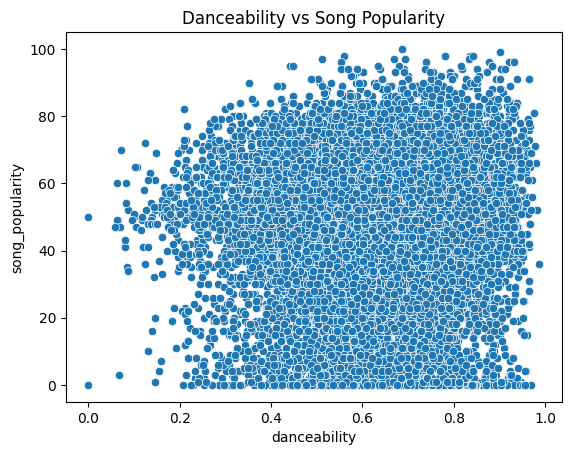

In [ ]:
sns.scatterplot(x='danceability', y='song_popularity', data=df)
plt.title("Danceability vs Song Popularity")
plt.show()

##**Analisis Korelasi dengan Heatmap**

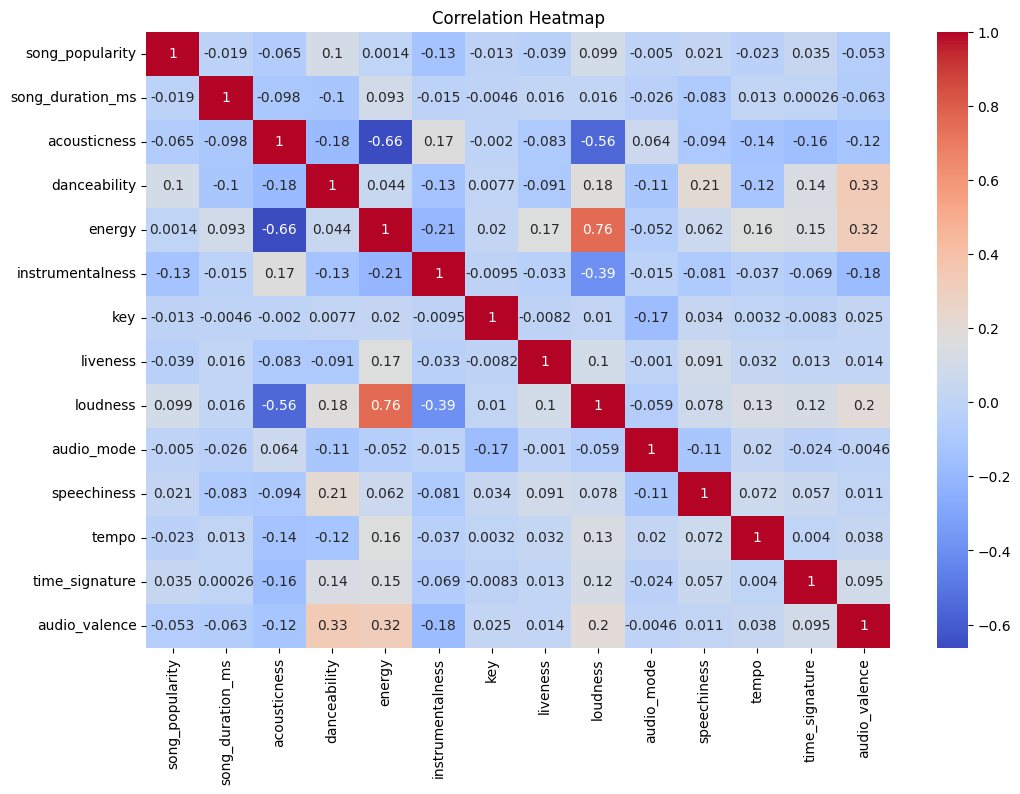

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

corr = df.corr(numeric_only=True) || nomeric_only=True = code ini untuk memastikan hanya kolom numerik yang digunakan.


#**Langkah 2: Data Pre-processing**

##**Menghapus atau Mengimputasi Missing Values**

In [ ]:
df = df.dropna()

##**Pemisahan Fitur dan Target**

In [ ]:
X = df.drop(columns=['song_name', 'song_popularity'])  # Anggap 'song_popularity' sebagai target
y = df['song_popularity']

**df.drop(columns=['song_name', 'song_popularity'])**: Bagian ini menghapus kolom **'song_name'** dan **'song_popularity'** dari DataFrame df. Kolom-kolom yang tersisa setelah penghapusan ini akan menjadi fitur-fitur yang akan digunakan untuk memprediksi nilai target.
**df['song_popularity']**: Bagian ini mengambil kolom 'song_popularity' dari DataFrame df dan menyimpannya dalam variabel y.

##**Skalasi Data**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**scaler = StandardScaler()**:
Membuat objek StandardScaler dari library scikit-learn.
Objek ini akan digunakan untuk menghitung rata-rata dan standar deviasi dari data.
**X_scaled = scaler.fit_transform(X)**:
**fit**: Menghitung rata-rata dan standar deviasi dari setiap fitur dalam X.

**transform**: Mengubah setiap nilai fitur dengan cara mengurangkan rata-rata dan membaginya dengan standar deviasi. Hasilnya disimpan dalam X_scaled.

#**Pemisahan Data Latih dan Uji**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)**

**train_test_split** dari library scikit-learn untuk membagi dataset menjadi dua bagian: data latih dan data uji.

**X_scaled**: Ini adalah data fitur yang telah di-skala.

**y**: Ini adalah data target yang ingin kita prediksi.

**test_size=0.2**: Ini berarti 20% dari data akan digunakan sebagai data uji, dan 80% sisanya akan digunakan sebagai data latih.

**random_state=42**: Ini adalah seed untuk generator bilangan acak. Dengan menggunakan seed yang sama, kita dapat memastikan bahwa pembagian data menjadi data latih dan data uji selalu sama, sehingga hasil eksperimen dapat direproduksi.

#**Langkah 3: Melatih Model Machine Learning**

##**Memilih Model dan Melatih**

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**RandomForestRegressor**: Ini adalah fungsi dari library scikit-learn yang digunakan untuk membuat model Random Forest Regressor.

**n_estimators=100**: Parameter ini menentukan jumlah decision tree yang akan dibangun dalam random forest. Dalam contoh ini, kita akan membangun 100 pohon keputusan.

**random_state=42**: Parameter ini digunakan untuk mengatur seed generator bilangan acak. Dengan menetapkan seed yang sama, kita dapat memastikan bahwa model yang dihasilkan akan selalu sama saat dijalankan berulang kali, sehingga memudahkan reproduksibilitas eksperimen.

**model.fit(X_train, y_train)**: Metode fit digunakan untuk melatih model Random Forest Regressor yang telah kita buat.

**X_train**: Ini adalah data latih yang berisi fitur-fitur yang akan digunakan untuk melatih model.

**y_train**: Ini adalah data target latih yang berisi nilai-nilai yang ingin diprediksi oleh model.


##**Evaluasi Model**

In [ ]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 296.11939493532327
R² Score: 0.3857421565488124


**model.predict(X_test)**: Fungsi predict digunakan untuk membuat prediksi pada data uji X_test. Model yang telah dilatih akan menggunakan fitur-fitur dalam X_test untuk memprediksi nilai target yang sesuai.

**mean_squared_error(y_test, y_pred)**: Menghitung Mean Squared Error (MSE) antara nilai target aktual y_test dan nilai prediksi y_pred. MSE adalah ukuran seberapa jauh prediksi model menyimpang dari nilai sebenarnya. Nilai MSE yang lebih kecil menunjukkan kinerja model yang lebih baik.

**r2_score(y_test, y_pred)**: Menghitung R-squared (R²) score, yang merupakan ukuran seberapa baik model dapat menjelaskan variansi dalam data. Nilai R² yang lebih tinggi menunjukkan bahwa model dapat menjelaskan lebih banyak variansi dalam data.

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
print(X_train.shape)

(15068, 13)
